In [2]:
# https://github.com/mortada/fredapi

fred_api_key = "cf80aa4b84f24ffb79b52ba1255b1803"

In [3]:
from fredapi import Fred
fred = Fred(api_key=fred_api_key)
data = fred.get_series('SP500')

In [4]:
data_first = fred.get_series_first_release('GDP')
data_first.tail()

date
2021-10-01    23992.355
2022-01-01    24382.683
2022-04-01    24851.809
2022-07-01    25663.289
2022-10-01    26132.458
Name: value, dtype: object

In [5]:
data = fred.get_series_all_releases("GDP")

In [6]:
data.tail()

,realtime_start,date,value
3098,2022-10-27,2022-07-01,25663.289
3099,2022-11-30,2022-07-01,25698.96
3100,2022-12-22,2022-07-01,25723.941
3101,2023-01-26,2022-10-01,26132.458
3102,2023-02-23,2022-10-01,26144.956


In [7]:
data_last = fred.get_series_latest_release("GDP")
data_last.tail()

2021-10-01    24349.121
2022-01-01    24740.480
2022-04-01    25248.476
2022-07-01    25723.941
2022-10-01    26144.956
dtype: float64

In [8]:
vintage_dates = fred.get_series_vintage_dates("GDP")
vintage_dates[1]

datetime.datetime(1991, 12, 20, 0, 0)

In [9]:
as_of = fred.get_series_as_of_date('GDP', '6/1/2022')
as_of

,realtime_start,date,value
0,1992-12-22,1946-01-01,199.7
1,1996-01-19,1946-01-01,NaT
2,1997-05-07,1946-01-01,210.4
3,1999-10-28,1946-01-01,NaT
4,1992-12-22,1946-04-01,207.7
...,...,...,...
3087,2022-01-27,2021-10-01,23992.355
3088,2022-02-24,2021-10-01,24008.472
3089,2022-03-30,2021-10-01,24002.815
3091,2022-04-28,2022-01-01,24382.683


In [10]:
fred.search('CPIAUCSL').T

series id,CPIAUCSL,RRSFS,AMBSLREAL,MZMREAL
id,CPIAUCSL,RRSFS,AMBSLREAL,MZMREAL
realtime_start,2023-03-13 00:00:00,2023-03-13 00:00:00,2023-03-13 00:00:00,2023-03-13 00:00:00
realtime_end,2023-03-13 00:00:00,2023-03-13 00:00:00,2023-03-13 00:00:00,2023-03-13 00:00:00
title,Consumer Price Index for All Urban Consumers: ...,Advance Real Retail and Food Services Sales,Real St. Louis Adjusted Monetary Base (DISCONT...,Real MZM Money Stock (DISCONTINUED)
observation_start,1947-01-01 00:00:00,1992-01-01 00:00:00,1947-01-01 00:00:00,1959-01-01 00:00:00
observation_end,2023-01-01 00:00:00,2023-01-01 00:00:00,2019-11-01 00:00:00,2021-01-01 00:00:00
frequency,Monthly,Monthly,Monthly,Monthly
frequency_short,M,M,M,M
units,Index 1982-1984=100,Millions of 1982-84 CPI Adjusted Dollars,Billions of 1982-84 Dollars,Billions of 1982-84 Dollars
units_short,Index 1982-1984=100,Mil. of 1982-84 CPI Adjusted $,Bil. of 1982-84 $,Bil. of 1982-84 $


In [11]:
# https://mortada.net/python-api-for-fred.html



import pandas as pd
pd.options.display.max_colwidth = 60

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(20, 5)

In [12]:
s = fred.get_series('SP500', observation_start='2014-09-02', observation_end='2014-09-05')
s.tail()

2014-09-02    2002.28
2014-09-03    2000.72
2014-09-04    1997.65
2014-09-05    2007.71
dtype: float64

In [13]:
info = fred.get_series_info('AKPCPI')
print(info)



id                                                         AKPCPI
realtime_start                                         2023-03-13
realtime_end                                           2023-03-13
title                        Per Capita Personal Income in Alaska
observation_start                                      1950-01-01
observation_end                                        2021-01-01
frequency                                                  Annual
frequency_short                                                 A
units                                                     Dollars
units_short                                                     $
seasonal_adjustment                       Not Seasonally Adjusted
seasonal_adjustment_short                                     NSA
last_updated                               2022-09-30 09:59:11-05
popularity                                                     14
dtype: object


In [14]:
personal_income_series = fred.search_by_release(175, limit=5, order_by='popularity', sort_order='desc')
personal_income_series['title']

series id
PCPI06037             Per Capita Personal Income in Los Angeles County, CA
PCPI06075      Per Capita Personal Income in San Francisco County/city, CA
DALL148PCPI    Per Capita Personal Income in Dallas-Fort Worth-Arlingto...
SEAT653PCPI    Per Capita Personal Income in Seattle-Tacoma-Bellevue, W...
BOST625PCPI    Per Capita Personal Income in Boston-Cambridge-Newton, M...
Name: title, dtype: object

<AxesSubplot:>

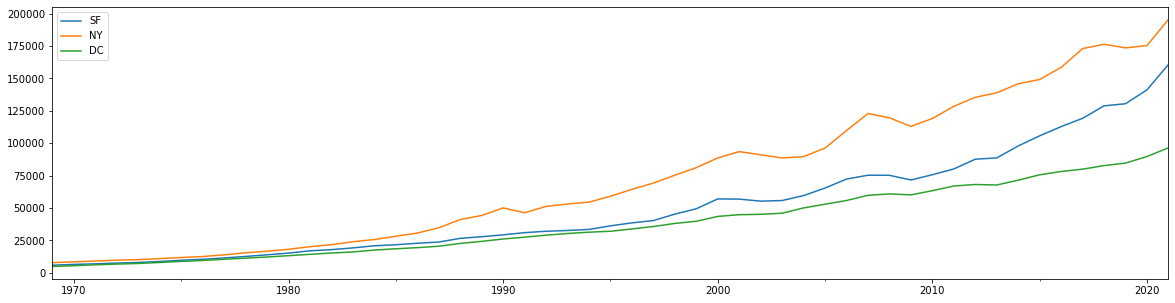

In [15]:
df = {}
df['SF'] = fred.get_series('PCPI06075')
df['NY'] = fred.get_series('PCPI36061')
df['DC'] = fred.get_series('PCPI11001')
df = pd.DataFrame(df)
df.plot()

In [16]:
df = fred.search_by_category(101, limit=10, order_by='popularity', sort_order='desc')
df['title']



series id
TOTALSL                            Total Consumer Credit Owned and Securitized
TERMCBCCALLNS      Commercial Bank Interest Rate on Credit Card Plans, All ...
TERMCBAUTO48NS     Finance Rate on Consumer Installment Loans at Commercial...
REVOLSL                        Revolving Consumer Credit Owned and Securitized
MVLOAS                               Motor Vehicle Loans Owned and Securitized
SLOAS                                      Student Loans Owned and Securitized
RIFLPBCIANM60NM    Finance Rate on Consumer Installment Loans at Commercial...
TERMCBPER24NS      Finance Rate on Personal Loans at Commercial Banks, 24 M...
TERMCBCCINTNS      Commercial Bank Interest Rate on Credit Card Plans, Acco...
TOTALSLAR                              Percent Change of Total Consumer Credit
Name: title, dtype: object

In [17]:
df = fred.search_by_release(110)



/Users/scottpayseur/conda/anaconda3/lib/python3.9/site-packages/fredapi/fred.py:356: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(next_data)
/Users/scottpayseur/conda/anaconda3/lib/python3.9/site-packages/fredapi/fred.py:356: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(next_data)


In [18]:
df[0:50]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
AKEACC,AKEACC,2023-03-13,2023-03-13,Accommodation and Food Services Earnings in Alaska,1998-01-01,2022-07-01,Quarterly,Q,Thousands of Dollars,Thous. of $,Seasonally Adjusted Annual Rate,SAAR,2022-12-23 09:12:16-06:00,1,Industry based on North American Industry Classification...
AKEADJ,AKEADJ,2023-03-13,2023-03-13,Residence Adjustment in Alaska,1998-01-01,2022-07-01,Quarterly,Q,Thousands of Dollars,Thous. of $,Seasonally Adjusted Annual Rate,SAAR,2022-12-23 09:12:16-06:00,1,The adjustment for residence consists of adjustments for...
AKEADM,AKEADM,2023-03-13,2023-03-13,Administrative and Waste Services Earnings in Alaska,1998-01-01,2022-07-01,Quarterly,Q,Thousands of Dollars,Thous. of $,Seasonally Adjusted Annual Rate,SAAR,2022-12-23 09:12:16-06:00,1,Industry based on North American Industry Classification...
AKEART,AKEART,2023-03-13,2023-03-13,"Arts, Entertainment and Recreation Earnings in Alaska",1998-01-01,2022-07-01,Quarterly,Q,Thousands of Dollars,Thous. of $,Seasonally Adjusted Annual Rate,SAAR,2022-12-23 09:12:16-06:00,1,Industry based on North American Industry Classification...
AKECON,AKECON,2023-03-13,2023-03-13,Construction Earnings in Alaska,1998-01-01,2022-07-01,Quarterly,Q,Thousands of Dollars,Thous. of $,Seasonally Adjusted Annual Rate,SAAR,2022-12-23 09:12:16-06:00,1,Industry based on North American Industry Classification...
AKEDUR,AKEDUR,2023-03-13,2023-03-13,Durable Manufacturing Earnings in Alaska,1998-01-01,2022-07-01,Quarterly,Q,Thousands of Dollars,Thous. of $,Seasonally Adjusted Annual Rate,SAAR,2022-12-23 09:12:16-06:00,1,Industry based on North American Industry Classification...
AKEEDU,AKEEDU,2023-03-13,2023-03-13,Educational Services Earnings in Alaska,1998-01-01,2022-07-01,Quarterly,Q,Thousands of Dollars,Thous. of $,Seasonally Adjusted Annual Rate,SAAR,2022-12-23 09:12:15-06:00,1,Industry based on North American Industry Classification...
AKEFIN,AKEFIN,2023-03-13,2023-03-13,Finance and Insurance Earnings in Alaska,1998-01-01,2022-07-01,Quarterly,Q,Thousands of Dollars,Thous. of $,Seasonally Adjusted Annual Rate,SAAR,2022-12-23 09:12:15-06:00,1,Industry based on North American Industry Classification...
AKEFOR,AKEFOR,2023-03-13,2023-03-13,"Forestry, Fishing, Related Activities, and Other Earning...",1998-01-01,2022-07-01,Quarterly,Q,Thousands of Dollars,Thous. of $,Seasonally Adjusted Annual Rate,SAAR,2022-12-23 09:12:15-06:00,1,Industry based on North American Industry Classification...


In [19]:
state_tmp_df = df[df['title'].str.startswith('Per Capita Personal Income in')]
state_df = state_tmp_df[~state_tmp_df['title'].str.startswith('Per Capita Personal Income in the')]

In [20]:
state_df.id.str[:2]

series id
AKPCPI    AK
ALPCPI    AL
AROPCI    AR
ARPCPI    AR
AZPCPI    AZ
CAPCPI    CA
COPCPI    CO
CTPCPI    CT
DEPCPI    DE
DSOPCI    DS
FLPCPI    FL
GAPCPI    GA
HIPCPI    HI
IAPCPI    IA
IDPCPI    ID
ILOPCI    IL
ILPCPI    IL
INOPCI    IN
INPCPI    IN
KSPCPI    KS
KYOPCI    KY
KYPCPI    KY
LAPCPI    LA
MAPCPI    MA
MDPCPI    MD
MEPCPI    ME
MIPCPI    MI
MNPCPI    MN
MOOPCI    MO
MOPCPI    MO
MSOPCI    MS
MSPCPI    MS
MTPCPI    MT
NCPCPI    NC
NDPCPI    ND
NEPCPI    NE
NHPCPI    NH
NJPCPI    NJ
NMPCPI    NM
NVPCPI    NV
NYPCPI    NY
OHPCPI    OH
OKPCPI    OK
ORPCPI    OR
PAPCPI    PA
RIPCPI    RI
SCPCPI    SC
SDPCPI    SD
TNOPCI    TN
TNPCPI    TN
TXPCPI    TX
UTPCPI    UT
VAPCPI    VA
VTPCPI    VT
WAPCPI    WA
WIPCPI    WI
WVPCPI    WV
WYPCPI    WY
Name: id, dtype: object

In [21]:
income_by_state = {}
for series_id in state_df.index:
    income_by_state[series_id[:2]] = fred.get_series(series_id)


In [22]:
income_by_state = pd.DataFrame(income_by_state)


In [23]:
income_by_state

,AK,AL,AR,AZ,CA,CO,CT,DE,DS,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1929-01-01,NaN,319.0,303.0,598.0,994.0,631.0,1029.0,1031.0,NaN,519.0,...,415.0,373.0,474.0,548.0,435.0,630.0,740.0,670.0,459.0,672.0
1930-01-01,NaN,263.0,224.0,518.0,889.0,574.0,927.0,858.0,NaN,468.0,...,357.0,321.0,407.0,494.0,387.0,572.0,657.0,585.0,407.0,582.0
1931-01-01,NaN,220.0,207.0,430.0,753.0,472.0,807.0,776.0,NaN,397.0,...,242.0,273.0,345.0,372.0,371.0,471.0,534.0,469.0,354.0,477.0
1932-01-01,NaN,159.0,152.0,322.0,584.0,357.0,627.0,591.0,NaN,317.0,...,189.0,194.0,262.0,304.0,286.0,363.0,402.0,362.0,257.0,375.0
1933-01-01,NaN,164.0,153.0,309.0,550.0,353.0,591.0,566.0,NaN,289.0,...,136.0,201.0,254.0,297.0,286.0,337.0,376.0,334.0,259.0,372.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45792.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,59618.0,41539.0,43384.0,45466.0,61508.0,58453.0,72926.0,52716.0,46320.0,51520.0,...,52166.0,46870.0,52005.0,45665.0,56619.0,52409.0,60221.0,50908.0,41279.0,60472.0
2019-01-01,61316.0,43288.0,44324.0,48124.0,64919.0,62124.0,75533.0,54217.0,NaN,54560.0,...,55294.0,49343.0,54076.0,48580.0,59073.0,55442.0,64189.0,52893.0,42951.0,64117.0
2020-01-01,62756.0,46179.0,47154.0,52327.0,70647.0,65358.0,78463.0,56324.0,NaN,57292.0,...,60446.0,52351.0,55601.0,52225.0,62189.0,59296.0,68350.0,55941.0,45240.0,65782.0


In [24]:
income_by_state.iloc[-1]

AK    65813.0
AL    49769.0
AR    50625.0
AZ    55487.0
CA    76614.0
CO    70706.0
CT    83294.0
DE    59931.0
DS        NaN
FL    62270.0
GA    55786.0
HI    60947.0
IA    57163.0
ID    52369.0
IL    67244.0
IN    56497.0
KS    58924.0
KY    51266.0
LA    54217.0
MA    83653.0
MD    69817.0
ME    58484.0
MI    56494.0
MN    66280.0
MO    55325.0
MS    45881.0
MT    56949.0
NC    56173.0
ND    64524.0
NE    61205.0
NH    73200.0
NJ    77016.0
NM    50311.0
NV    60213.0
NY    76837.0
OH    56879.0
OK    53870.0
OR    61596.0
PA    64279.0
RI    64376.0
SC    52467.0
SD    64462.0
TN    56560.0
TX    59865.0
UT    56019.0
VA    66305.0
VT    61882.0
WA    73775.0
WI    59626.0
WV    48488.0
WY    69666.0
Name: 2021-01-01 00:00:00, dtype: float64

Text(0.5, 1.0, 'Per Capita Personal Income by State')

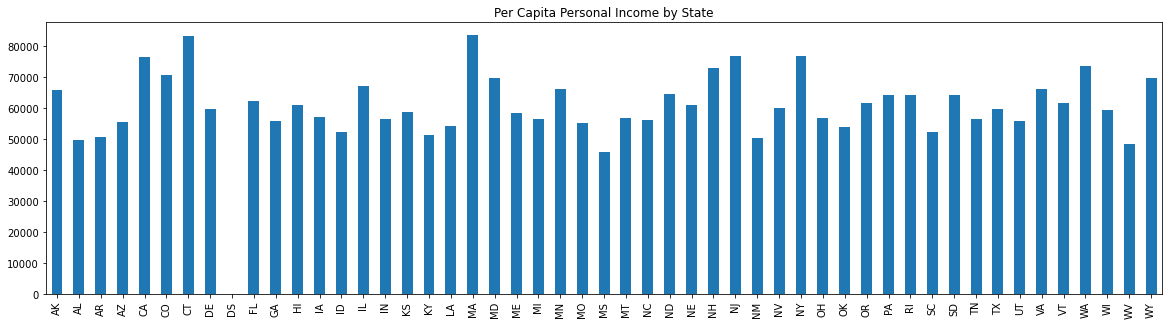

In [25]:
income_by_state.iloc[-1].plot(kind='bar')
plt.title('Per Capita Personal Income by State')


In [26]:
income_by_state.describe

<bound method NDFrame.describe of                  AK       AL       AR       AZ       CA       CO       CT  \
1929-01-01      NaN    319.0    303.0    598.0    994.0    631.0   1029.0   
1930-01-01      NaN    263.0    224.0    518.0    889.0    574.0    927.0   
1931-01-01      NaN    220.0    207.0    430.0    753.0    472.0    807.0   
1932-01-01      NaN    159.0    152.0    322.0    584.0    357.0    627.0   
1933-01-01      NaN    164.0    153.0    309.0    550.0    353.0    591.0   
...             ...      ...      ...      ...      ...      ...      ...   
2017-10-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2018-01-01  59618.0  41539.0  43384.0  45466.0  61508.0  58453.0  72926.0   
2019-01-01  61316.0  43288.0  44324.0  48124.0  64919.0  62124.0  75533.0   
2020-01-01  62756.0  46179.0  47154.0  52327.0  70647.0  65358.0  78463.0   
2021-01-01  65813.0  49769.0  50625.0  55487.0  76614.0  70706.0  83294.0   

                 DE       DS       FL  ..

In [27]:
df = fred.search_by_release(10)


/Users/scottpayseur/conda/anaconda3/lib/python3.9/site-packages/fredapi/fred.py:356: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(next_data)
/Users/scottpayseur/conda/anaconda3/lib/python3.9/site-packages/fredapi/fred.py:356: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(next_data)
/Users/scottpayseur/conda/anaconda3/lib/python3.9/site-packages/fredapi/fred.py:356: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(next_data)
/Users/scottpayseur/conda/anaconda3/lib/python3.9/site-packages/fredapi/fred.py:356: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(next_data)


In [28]:
pd.options.display.max_colwidth = 100


df.iloc[0:]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAPPNS,CPIAPPNS,2023-03-13,2023-03-13,Consumer Price Index for All Urban Consumers: Apparel in U.S. City Average,1914-12-01,2023-01-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-02-14 07:40:09-06:00,17,None
CPIAPPSL,CPIAPPSL,2023-03-13,2023-03-13,Consumer Price Index for All Urban Consumers: Apparel in U.S. City Average,1947-01-01,2023-01-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-02-14 07:41:35-06:00,62,None
CPIAUCNS,CPIAUCNS,2023-03-13,2023-03-13,Consumer Price Index for All Urban Consumers: All Items in U.S. City Average,1913-01-01,2023-01-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-02-14 07:41:01-06:00,71,Handbook of Methods (https://www.bls.gov/opub/hom/pdf/cpihom.pdf) Understanding the CPI: Frequen...
CPIAUCSL,CPIAUCSL,2023-03-13,2023-03-13,Consumer Price Index for All Urban Consumers: All Items in U.S. City Average,1947-01-01,2023-01-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-02-14 07:41:49-06:00,94,The Consumer Price Index for All Urban Consumers: All Items (CPIAUCSL) is a price index of a bas...
CPIEDUNS,CPIEDUNS,2023-03-13,2023-03-13,Consumer Price Index for All Urban Consumers: Education and Communication in U.S. City Average,1993-01-01,2023-01-01,Monthly,M,Index Dec 1997=100,Index Dec 1997=100,Not Seasonally Adjusted,NSA,2023-02-14 07:39:20-06:00,3,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUUR0000SAS,SUUR0000SAS,2023-03-13,2023-03-13,Chained Consumer Price Index for All Urban Consumers: Services in U.S. City Average,1999-12-01,2023-01-01,Monthly,M,Index Dec 1999=100,Index Dec 1999=100,Not Seasonally Adjusted,NSA,2023-02-14 07:41:06-06:00,2,None
SUUR0000SAT,SUUR0000SAT,2023-03-13,2023-03-13,Chained Consumer Price Index for All Urban Consumers: Transportation in U.S. City Average,1999-12-01,2023-01-01,Monthly,M,Index Dec 1999=100,Index Dec 1999=100,Not Seasonally Adjusted,NSA,2023-02-14 07:41:07-06:00,3,None
SUUR0000SAT1,SUUR0000SAT1,2023-03-13,2023-03-13,Chained Consumer Price Index for All Urban Consumers: Private Transportation in U.S. City Average,1999-12-01,2023-01-01,Monthly,M,Index Dec 1999=100,Index Dec 1999=100,Not Seasonally Adjusted,NSA,2023-02-14 07:41:36-06:00,2,None
